In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('Data/mymoviedb.csv', sep=None)

/var/folders/cy/ymygl9wx44n__4jnpzrvdmpc0000gn/T/ipykernel_2016/1293976045.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('Data/mymoviedb.csv', sep=None)


In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [6]:
df.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

In [7]:
df.dropna(inplace=True)

## Removing unacessry data
- overview column 
- original_column
- posetr_url column 

## issues in data 
- genre column has coma seprayed values and white spaces that needs to be handled
- relase_date column hase object data type instead of 
- vote_count column has also a object data type intead of int 
- vote average column has aslo a object intead of float

## null values
- title column and overview columan have a 9 missing values
- popularity,vote_count,vote_average,original_language have 10 missing value
- genre and poster_url have 11 missing values

In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [13]:
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'])

In [14]:
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'])

In [18]:
df.drop(columns=['Overview', 'Original_Language', 'Poster_Url'],inplace=True)

In [20]:
df['Release_Date'] = df['Release_Date'].dt.year.astype('Int64')

In [22]:
df.drop_duplicates(inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9826 non-null   Int64  
 1   Title         9826 non-null   object 
 2   Popularity    9826 non-null   float64
 3   Vote_Count    9826 non-null   int64  
 4   Vote_Average  9826 non-null   float64
 5   Genre         9826 non-null   object 
dtypes: Int64(1), float64(2), int64(1), object(2)
memory usage: 547.0+ KB


In [26]:
df['Popularity'] = df['Popularity'].round(2)

In [28]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.95,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.66,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.09,122,6.3,Thriller
3,2021,Encanto,2402.20,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.51,1793,7.0,"Action, Adventure, Thriller, War"


In [29]:
def catigorize_col(df,col,labels):

    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col],edges, labels = labels , duplicates='drop')
    return df

In [30]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
catigorize_col(df,'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [31]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.95,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.66,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.09,122,below_avg,Thriller
3,2021,Encanto,2402.20,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.51,1793,average,"Action, Adventure, Thriller, War"


In [36]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.95,8940,popular,"[Action, Adventure, Science Fiction]"
1,2022,The Batman,3827.66,1151,popular,"[Crime, Mystery, Thriller]"
2,2022,No Exit,2618.09,122,below_avg,[Thriller]
3,2021,Encanto,2402.20,5076,popular,"[Animation, Comedy, Family, Fantasy]"
4,2021,The King's Man,1895.51,1793,average,"[Action, Adventure, Thriller, War]"


In [37]:
df = df.explode('Genre').reset_index(drop=True)

In [38]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.95,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.95,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.95,8940,popular,Science Fiction
3,2022,The Batman,3827.66,1151,popular,Crime
4,2022,The Batman,3827.66,1151,popular,Mystery


In [39]:
df['Genre'] = df['Genre'].astype('category')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  Int64   
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  int64   
 4   Vote_Average  25551 non-null  category
 5   Genre         25792 non-null  category
dtypes: Int64(1), category(2), float64(1), int64(1), object(1)
memory usage: 882.6+ KB


In [44]:
df['Vote_Average'] = df['Vote_Average'].astype('object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  Int64   
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  int64   
 4   Vote_Average  25551 non-null  object  
 5   Genre         25792 non-null  category
dtypes: Int64(1), category(1), float64(1), int64(1), object(2)
memory usage: 1.0+ MB


In [46]:
df.dropna(inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25551 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  Int64   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  int64   
 4   Vote_Average  25551 non-null  object  
 5   Genre         25551 non-null  category
dtypes: Int64(1), category(1), float64(1), int64(1), object(2)
memory usage: 1.2+ MB


In [48]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.95,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.95,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.95,8940,popular,Science Fiction
3,2022,The Batman,3827.66,1151,popular,Crime
4,2022,The Batman,3827.66,1151,popular,Mystery


## data visulazation

In [49]:
sns.set_style('whitegrid')


## what is the most frequent genre of movies released on netflix?

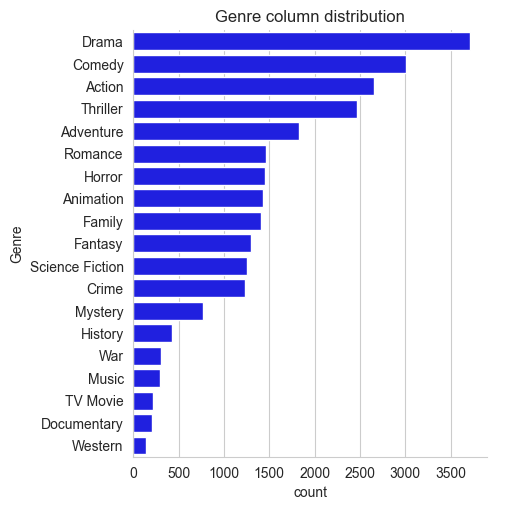

In [54]:
sns.catplot(y = 'Genre', data = df, kind='count',
order = df['Genre'].value_counts().index,
color='blue')
plt.title("Genre column distribution")
plt.show()


most frequent genre is Drama 

which has highest votes in vote  vote_avg column?

In [55]:
df['Vote_Average'].value_counts(
    
)

Vote_Average
average        6612
popular        6520
below_avg      6348
not_popular    6071
Name: count, dtype: int64

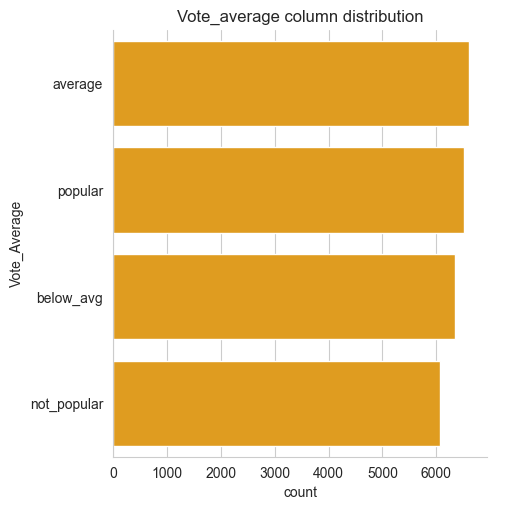

In [58]:
sns.catplot(y = 'Vote_Average', data = df, kind='count',
order = df['Vote_Average'].value_counts().index,
color='orange')
plt.title("Vote_average column distribution")
plt.show()

what movie got the highest popularity? what's its genre?

In [59]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.95,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.95,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.95,8940,popular,Science Fiction


which movie has lowes poplarity and what's its genre

In [60]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021,The United States vs. Billie Holiday,13.35,152,average,Music
25787,2021,The United States vs. Billie Holiday,13.35,152,average,Drama
25788,2021,The United States vs. Billie Holiday,13.35,152,average,History
25789,1984,Threads,13.35,186,popular,War
25790,1984,Threads,13.35,186,popular,Drama
25791,1984,Threads,13.35,186,popular,Science Fiction


which year has the most filmmed movies?

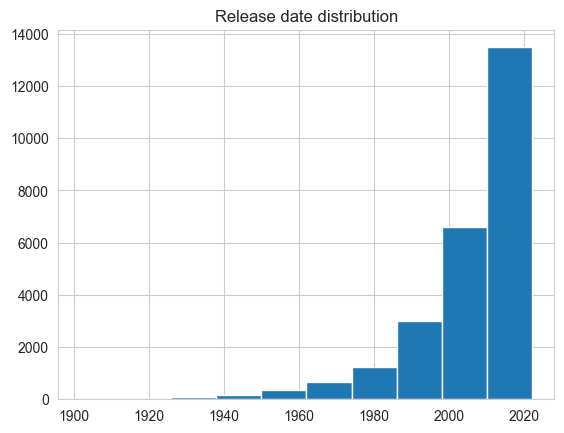

In [61]:
df['Release_Date'].hist()
plt.title('Release date distribution')
plt.show()

## Conclusion
Q1: what is the most frequent genre in the dataset?
ANS: drama genre is the most frequent genre in our datasets and has appread more than 14% of the times among 19 other genres.

Q.2: what genre has highest votes?
ANS: we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the hieghest popularity among fans by being having more than 18.5% of movies 

Q.3: what movie got the lowest popularity ? what's its genre?
ANS: the united states , thread has the highest lowest rate in our dataset and it has genres of music,drama,war,sci-fi.

Q.4 which year has the most flimmed movies?
ANS: year 2020 has the highest filming rate in our dataset